# Deepfake Detection Analysis
This notebook simulates a deepfake detection pipeline with 10 real and 10 fake videos. It includes visualizations, feature summary tables, and a logistic regression classifier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

np.random.seed(42)
video_ids = [f"video_{i+1}" for i in range(20)]
labels = ['real'] * 10 + ['fake'] * 10
avg_brightness = np.concatenate([np.random.normal(150, 10, 10), np.random.normal(100, 15, 10)])
motion_variance = np.concatenate([np.random.normal(5, 1, 10), np.random.normal(15, 3, 10)])
blurriness_score = np.concatenate([np.random.normal(20, 5, 10), np.random.normal(35, 8, 10)])

df = pd.DataFrame({
    'Video_ID': video_ids,
    'Label': labels,
    'Avg_Brightness': avg_brightness,
    'Motion_Variance': motion_variance,
    'Blurriness_Score': blurriness_score
})
df.head()

,Video_ID,Label,Avg_Brightness,Motion_Variance,Blurriness_Score
0,video_1,real,154.967142,6.465649,23.692333
1,video_2,real,148.617357,4.774224,20.856841
2,video_3,real,156.476885,5.067528,19.421759
3,video_4,real,165.230299,3.575252,18.494482
4,video_5,real,147.658466,4.455617,12.607390


In [3]:

df.groupby('Label').mean(numeric_only=True)

,Avg_Brightness,Motion_Variance,Blurriness_Score
Label,,,
fake,88.140126,14.069680,36.595531
real,154.480611,4.778156,18.735889


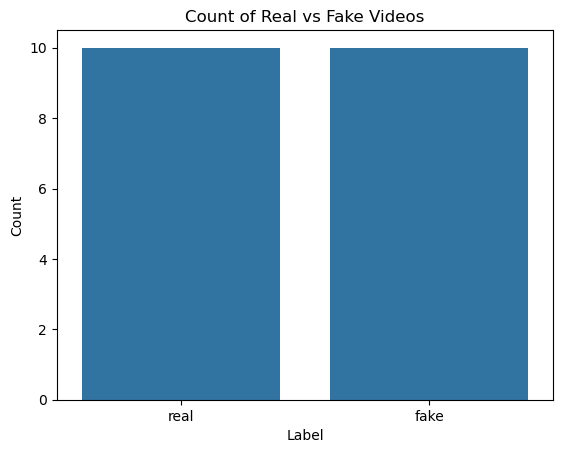

In [5]:

sns.countplot(data=df, x='Label')
plt.title('Count of Real vs Fake Videos')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

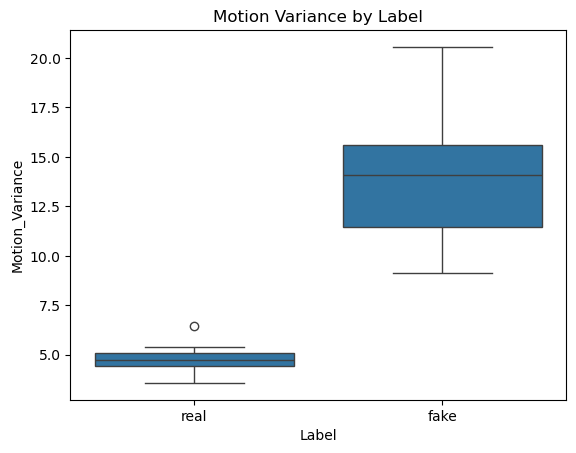

In [7]:
sns.boxplot(data=df, x='Label', y='Motion_Variance')
plt.title('Motion Variance by Label')
plt.show()

In [9]:
X = df[['Avg_Brightness', 'Motion_Variance', 'Blurriness_Score']]
y = df['Label'].map({'real': 0, 'fake': 1})
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
df['Predicted_Label'] = np.where(y_pred == 1, 'fake', 'real')
df[['Video_ID', 'Label', 'Predicted_Label']].head()

,Video_ID,Label,Predicted_Label
0,video_1,real,real
1,video_2,real,real
2,video_3,real,real
3,video_4,real,real
4,video_5,real,real


In [11]:
pd.DataFrame(classification_report(y, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,10.0
1,1.0,1.0,1.0,10.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,20.0
weighted avg,1.0,1.0,1.0,20.0


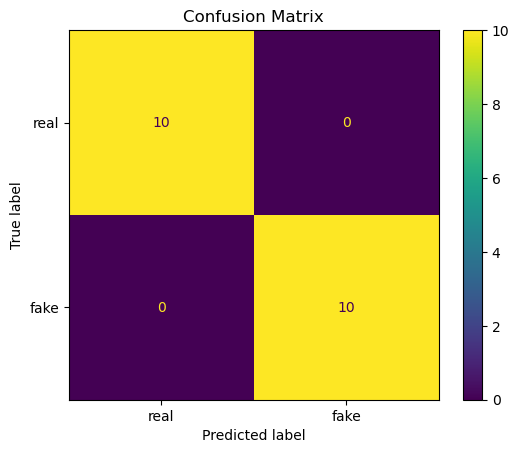

In [13]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['real', 'fake'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [20]:
df['Label_Encoded'] = LabelEncoder().fit_transform(df['Label']) 


In [22]:
X = df[['Avg_Brightness', 'Motion_Variance', 'Blurriness_Score']].values
y = df['Label_Encoded'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(3,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0332 - val_accuracy: 1.0000 - val_loss: 0.0219
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 1.0000 - loss: 0.0144 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0175
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0213
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 0.

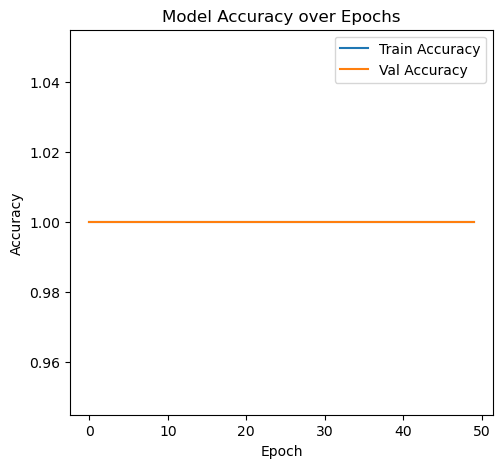

In [42]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

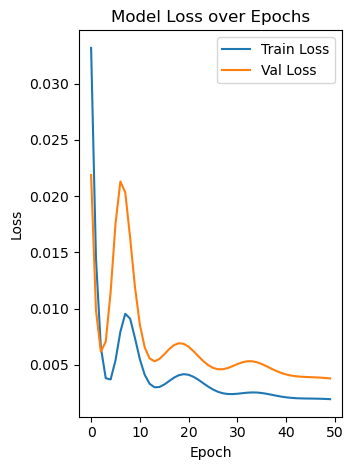

In [44]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
Confusion Matrix:
[[2 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


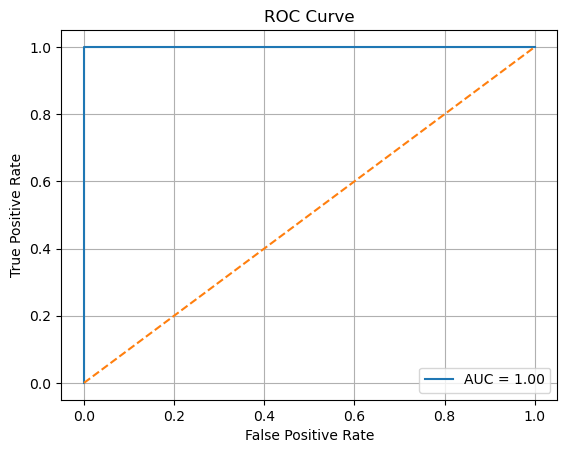

In [48]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
